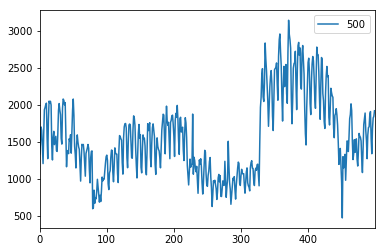

In [1]:
import pandas as pd
from matplotlib import pyplot
 
df = pd.read_csv('/Users/ralagianambi/Desktop/web_analytics_timeseries_hackerrank.txt')
# print(df.head())
df.plot()
pyplot.show()

In [2]:
len(df)

500

In [3]:
df['date_det']=pd.date_range(start='10/1/2012', periods=500)

In [4]:
df['date_det'].head()

0   2012-10-01
1   2012-10-02
2   2012-10-03
3   2012-10-04
4   2012-10-05
Name: date_det, dtype: datetime64[ns]

In [5]:
df.head()

,500,date_det
0,1339,2012-10-01
1,1462,2012-10-02
2,1702,2012-10-03
3,1656,2012-10-04
4,1439,2012-10-05


In [6]:

df.rename(columns={'500': 'web_traffic'}, inplace=True)

In [10]:
df.head()

,web_traffic,date_det
0,1339,2012-10-01
1,1462,2012-10-02
2,1702,2012-10-03
3,1656,2012-10-04
4,1439,2012-10-05


In [7]:
ts=df['web_traffic']

In [19]:
# from statsmodels.tsa.stattools import adfuller
# from pandas import datetools
# check_adfuller
# def check_adfuller(ts):
#     # Dickey-Fuller test
#     result = adfuller(ts, autolag='AIC')
#     print('Test statistic: ' , result[0])
#     print('p-value: '  ,result[1])
#     print('Critical Values:' ,result[4])
# check_mean_std
# def check_mean_std(df):
#     #Rolling statistics
#     rolmean = df.rolling(window=6).mean()
#     rolstd = df.rolling(window=6).std()
#     plt.figure(figsize=(22,10))   
#     orig = plt.plot(df, color='red',label='Original')
#     mean = plt.plot(rolmean, color='black', label='Rolling Mean')
#     std = plt.plot(rolstd, color='green', label = 'Rolling Std')
#     plt.xlabel("date_det")
#     plt.ylabel("web_traffic	")
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.legend()
#     plt.show()
    
# # check stationary: mean, variance(std)and adfuller test
# check_mean_std(df)
# check_adfuller(ts)

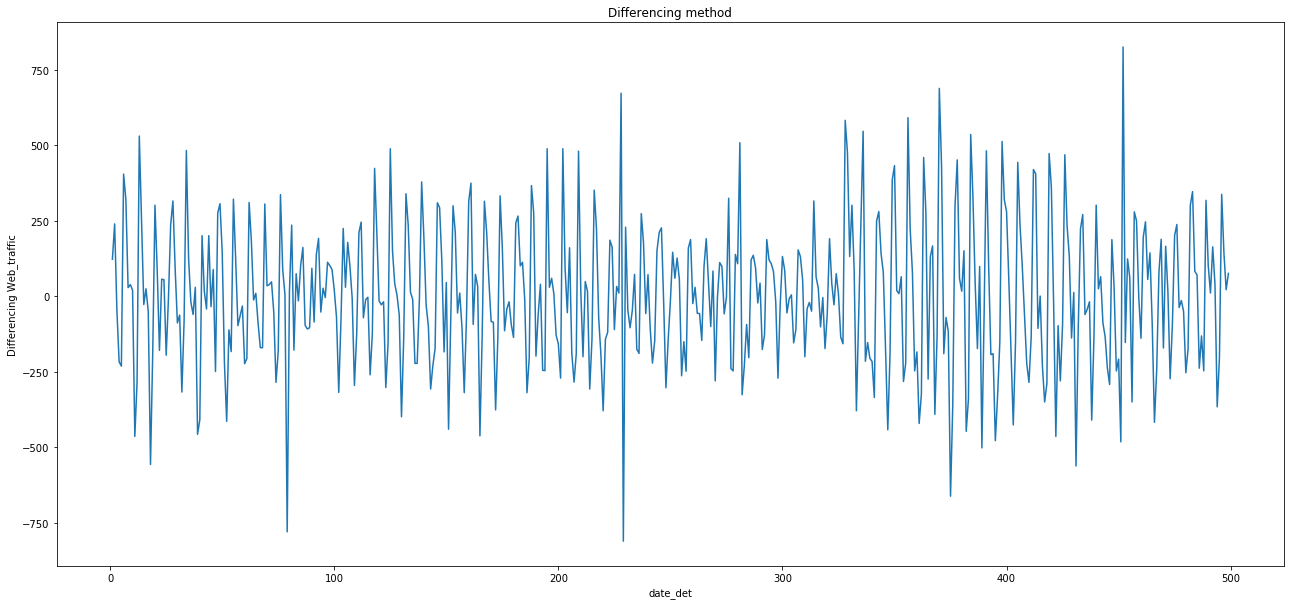

In [12]:
# differencing method
import matplotlib.pyplot as plt

ts_diff = df['web_traffic'] - df['web_traffic'].shift()
plt.figure(figsize=(22,10))
plt.plot(ts_diff)
plt.title("Differencing method") 
plt.xlabel("date_det")
plt.ylabel("Differencing Web_traffic")
plt.show()

In [18]:
from statsmodels.tsa.arima_model import ARIMA
# # from pandas.core.tools.datetimes import ARIMA
order = (1, 0, 1)
model = ARIMA(df, order, freq='D')
fitted_model = model.fit()

AttributeError: module 'pandas' has no attribute 'WidePanel'

In [ ]:
#some info
https://www.statsmodels.org/0.9.0/generated/statsmodels.tsa.stattools.acf.html
    
https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
    
example:from link: https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.value[:85]
test = df.value[85:]
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  
# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()